<a href="https://colab.research.google.com/github/salma91AFG/data_wrangling/blob/main/df_https_www_kaggle_com_datasets_olistbr_brazilian_ecommerce_npower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size: 40px; font-weight: bold; color: blue; text-align: center; line-height: 1.2;">
  TD Python – Data Wrangling avec le dataset Olist
</h1>



lien DataSet : https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?resource=download


# Approche de préparation des données – Projet Olist


---

##  Nettoyage

1. **Chargement des fichiers** directement depuis le site Kaggle  
2. **Familiarisation** avec la structure des données (`.head()`, `.info()`, `.describe()`)  
3. **Conversion des types** de données selon leur nature sémantique (dates, numériques, catégorielles, etc.)  
4. **Normalisation des colonnes textuelles** (ex. : noms de ville) pour supprimer les accents et harmoniser les formats  
5. **Suppression des doublons**  
6. **Suppression des lignes vides**  
7. **Analyse des valeurs manquantes**  
8. **Traitement contextuel** des valeurs manquantes (imputation, exclusion ou étiquetage)

---

##  Transformation

1. Création de la colonne `durée_livraison` (date_livraison réelle - date_achat)  
2. Création de la colonne `écart_livraison` (date_estimée - date_livraison réelle)  
3. Création de la colonne booléenne `livraison_à_temps`  
4. Ajout d'une colonne `montant_commande` (produits + frais de livraison)  
5. Création de la colonne `montant_frais_commande` isolant les frais

---

##  Enrichissement

1. **Sélection des colonnes pertinentes** pour l’analyse (features engineering)  
2. **Jointure** avec la table des clients pour récupérer les informations géographiques et les scores de satisfaction associés

---

##  Analyse exploratoire

1. Répartition du **score de satisfaction (`review_score`)**  
2. Impact du **retard de livraison** sur la satisfaction  
3. Influence du **montant de la commande** sur la satisfaction  
4. Identification des **villes avec le plus de commandes en retard**  
5. Produits et catégories **associés à des retards fréquents**  
6. **Durée moyenne de livraison par catégorie** de produit (`groupby + mean`)

---



# Etape 1 – Chargement & Nettoyage

### Setup

In [ ]:
!pip install unidecode
import pathlib
import os
import sys
from IPython.display import display
import re
from unidecode import unidecode
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 2.8 MB/s eta 0:00:00


### 1. Charger les fichiers suivants : directement de Kaggle

*   list_customers_dataset.csv
*   olist_sellers_dataset.csv
*   olist_order_reviews_dataset.csv
*   olist_order_items_dataset.csv
*   olist_products_dataset.csv
*   olist_geolocation_dataset.csv
*   product_category_name_translation.csv
*   olist_orders_dataset.csv
*   olist_order_payments_dataset.csv

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

for filename in os.listdir(path):
    print(filename)

Path to dataset files: /kaggle/input/brazilian-ecommerce
olist_customers_dataset.csv
olist_sellers_dataset.csv
olist_order_reviews_dataset.csv
olist_order_items_dataset.csv
olist_products_dataset.csv
olist_geolocation_dataset.csv
product_category_name_translation.csv
olist_orders_dataset.csv
olist_order_payments_dataset.csv


In [ ]:
# associer un nom court à chaque fichier csv
file_names={"orders":"olist_orders_dataset.csv",
    "items":"olist_order_items_dataset.csv",
    "reviews":"olist_order_reviews_dataset.csv",
    "payments":"olist_order_payments_dataset.csv",
    "customers":"olist_customers_dataset.csv",
    "geolocation":"olist_geolocation_dataset.csv",
    "products":"olist_products_dataset.csv",
    "sellers":"olist_sellers_dataset.csv",
    "category":"product_category_name_translation.csv"
    }
# créer les chemins des fichiers sous form de dict
path_datasets = {}
for k, v in file_names.items():
    path_dataset = {k :  os.path.join(path, v) }
    path_datasets.update(path_dataset)
    print(path_dataset)



{'orders': '/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv'}
{'items': '/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv'}
{'reviews': '/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv'}
{'payments': '/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv'}
{'customers': '/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv'}
{'geolocation': '/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv'}
{'products': '/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv'}
{'sellers': '/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv'}
{'category': '/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv'}


In [ ]:
#dfs est un doctionaire contient les 9 dataframes chargés
dfs = {}

for k, v in path_datasets.items():
    with open(v, "r") as f:
        df = pd.read_csv(f)
        dfs.update({k: df})

### 2.Familiarisation

In [ ]:
for x in dfs:
  print("----------------------------------------------------------------------------------------------------------------------------------------------------")
  print(x)
  print("-----------------------------------------------------------------------------------------------------------------------------------------------------")
  display(dfs[x].head())


----------------------------------------------------------------------------------------------------------------------------------------------------
orders
-----------------------------------------------------------------------------------------------------------------------------------------------------


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


----------------------------------------------------------------------------------------------------------------------------------------------------
items
-----------------------------------------------------------------------------------------------------------------------------------------------------


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


----------------------------------------------------------------------------------------------------------------------------------------------------
reviews
-----------------------------------------------------------------------------------------------------------------------------------------------------


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


----------------------------------------------------------------------------------------------------------------------------------------------------
payments
-----------------------------------------------------------------------------------------------------------------------------------------------------


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


----------------------------------------------------------------------------------------------------------------------------------------------------
customers
-----------------------------------------------------------------------------------------------------------------------------------------------------


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


----------------------------------------------------------------------------------------------------------------------------------------------------
geolocation
-----------------------------------------------------------------------------------------------------------------------------------------------------


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


----------------------------------------------------------------------------------------------------------------------------------------------------
products
-----------------------------------------------------------------------------------------------------------------------------------------------------


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


----------------------------------------------------------------------------------------------------------------------------------------------------
sellers
-----------------------------------------------------------------------------------------------------------------------------------------------------


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


----------------------------------------------------------------------------------------------------------------------------------------------------
category
-----------------------------------------------------------------------------------------------------------------------------------------------------


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
for x in dfs:
  print("--------------------------------------------------------------------------------------------------------------------------------------------------")
  print(x)
  print("---------------------------------------------------------------------------------------------------------------------------------------------------")
  display(dfs[x].info())


--------------------------------------------------------------------------------------------------------------------------------------------------
orders
---------------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object


None

--------------------------------------------------------------------------------------------------------------------------------------------------
items
---------------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

--------------------------------------------------------------------------------------------------------------------------------------------------
reviews
---------------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None

--------------------------------------------------------------------------------------------------------------------------------------------------
payments
---------------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

--------------------------------------------------------------------------------------------------------------------------------------------------
customers
---------------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

--------------------------------------------------------------------------------------------------------------------------------------------------
geolocation
---------------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None

--------------------------------------------------------------------------------------------------------------------------------------------------
products
---------------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width

None

--------------------------------------------------------------------------------------------------------------------------------------------------
sellers
---------------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

--------------------------------------------------------------------------------------------------------------------------------------------------
category
---------------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None

In [ ]:
# Descriptions
for x in dfs:
  print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
  print(x)
  print("-----------------------------------------------------------------------------------------------------------------------------------------------------------")
  display(dfs[x].describe(include='all'))

----------------------------------------------------------------------------------------------------------------------------------------------------------
orders
-----------------------------------------------------------------------------------------------------------------------------------------------------------


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


----------------------------------------------------------------------------------------------------------------------------------------------------------
items
-----------------------------------------------------------------------------------------------------------------------------------------------------------


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


----------------------------------------------------------------------------------------------------------------------------------------------------------
reviews
-----------------------------------------------------------------------------------------------------------------------------------------------------------


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,4548534449b1f572e357211b90724f1b,03c939fd7fd3b38f8485a0f95798f1f6,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------------------------------------------------------------
payments
-----------------------------------------------------------------------------------------------------------------------------------------------------------


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


----------------------------------------------------------------------------------------------------------------------------------------------------------
customers
-----------------------------------------------------------------------------------------------------------------------------------------------------------


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


----------------------------------------------------------------------------------------------------------------------------------------------------------
geolocation
-----------------------------------------------------------------------------------------------------------------------------------------------------------


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


----------------------------------------------------------------------------------------------------------------------------------------------------------
products
-----------------------------------------------------------------------------------------------------------------------------------------------------------


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


----------------------------------------------------------------------------------------------------------------------------------------------------------
sellers
-----------------------------------------------------------------------------------------------------------------------------------------------------------


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


----------------------------------------------------------------------------------------------------------------------------------------------------------
category
-----------------------------------------------------------------------------------------------------------------------------------------------------------


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### 3. Traitement des types de données

### 3.1 classification sémantique des types de données

In [ ]:
# liste de tout les colonne de type Date
date_columns=["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date",
              "shipping_limit_date",
              "review_creation_date","review_answer_timestamp"]

float_columns=["price","freight_value","payment_value","geolocation_lat","geolocation_lng","product_name_lenght","product_description_lenght","product_weight_g",
               "product_length_cm","product_height_cm","product_width_cm"]

int_columns=["review_score","payment_sequential","payment_installments","product_photos_qty"]


### 3.2 changement de type

In [ ]:
for name, df in dfs.items():
    for col in df.columns:
        if col in date_columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')  # NaT en cas d'erreur
        elif col in int_columns:
            df[col] = pd.to_numeric(df[col], errors='coerce').astype("Int64")  # gère les NaN
        elif col in float_columns:
            df[col] = pd.to_numeric(df[col], errors='coerce').astype("float")  # gère les NaN




### 4. Normalisation des colonne textuelle

In [ ]:
def normalize_text(x):
    if isinstance(x, str): #vérifier pour ne pas toucher au Nan et number
        x = unidecode(x.lower()) #supprime les accents
        x = re.sub(r'\s+', ' ', x)  # remplace tous les espaces multiples par un seul
        return x.strip()
    return x

In [ ]:
for x in dfs:
  df=dfs[x]
  for col in df.select_dtypes(include=["object", "string"]).columns: # normaliser juste les colonnes text
    df[col] = df[col].apply(normalize_text)


### 5. Supression des doublons :

In [ ]:
for x in dfs:

  before = len(dfs[x])
  dfs[x].drop_duplicates(inplace=True)
  after = len(dfs[x])
  print(f"Lignes supprimées (doublons) table {x} : {before - after}")


Lignes supprimées (doublons) table orders : 0
Lignes supprimées (doublons) table items : 0
Lignes supprimées (doublons) table reviews : 0
Lignes supprimées (doublons) table payments : 0
Lignes supprimées (doublons) table customers : 0
Lignes supprimées (doublons) table geolocation : 279667
Lignes supprimées (doublons) table products : 0
Lignes supprimées (doublons) table sellers : 0
Lignes supprimées (doublons) table category : 0


### 6. Suppression des lignes vide (ligne avec toute les valeurs null)

In [ ]:
for x in dfs:

  before = len(dfs[x])
  dfs[x].dropna(how='all',inplace=True)
  after = len(dfs[x])
  print(f"Lignes vides supprimés table {x} : {before - after}")

Lignes vides supprimés table orders : 0
Lignes vides supprimés table items : 0
Lignes vides supprimés table reviews : 0
Lignes vides supprimés table payments : 0
Lignes vides supprimés table customers : 0
Lignes vides supprimés table geolocation : 0
Lignes vides supprimés table products : 0
Lignes vides supprimés table sellers : 0
Lignes vides supprimés table category : 0


### 7. zoom sur les valeurs manquantes

In [ ]:
for x in dfs:
    print("--------------------------------------------------------------------------------------------------------------------------------------------------")
    print(x)
    print("---------------------------------------------------------------------------------------------------------------------------------------------------")
    missing_percent = round(dfs[x].isna().sum() / len(dfs[x]) * 100, 2)
    print(missing_percent.astype(str) + "%")

--------------------------------------------------------------------------------------------------------------------------------------------------
orders
---------------------------------------------------------------------------------------------------------------------------------------------------
order_id                          0.0%
customer_id                       0.0%
order_status                      0.0%
order_purchase_timestamp          0.0%
order_approved_at                0.16%
order_delivered_carrier_date     1.79%
order_delivered_customer_date    2.98%
order_estimated_delivery_date     0.0%
dtype: object
--------------------------------------------------------------------------------------------------------------------------------------------------
items
---------------------------------------------------------------------------------------------------------------------------------------------------
order_id               0.0%
order_item_id          0.0%
product_id     

### 8. Vérification de la redondance selon les colonnes clés pour chaque table
* orders-> (order_id,customer_id)
* items-> (order_id,order_item_id,product_id,seller_id)
* reviews-> (review_id,order_id)
* payments-> (order_id,payment_sequential)
* customers-> (customer_id, customer_unique_id)
* geolocation-> (geolocation_zip_code_prefix,geolocation_lat,geolocation_lng)
* products-> (product_id)
* sellers-> (seller_id)
* category-> (product_category_name)

In [ ]:
keys_dict = {
    "orders": ["order_id", "customer_id"],
    "items": ["order_id", "order_item_id", "product_id", "seller_id"],
    "reviews": ["review_id", "order_id"],
    "payments": ["order_id", "payment_sequential"],
    "customers": ["customer_id", "customer_unique_id"],
    "geolocation": ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng','geolocation_city', 'geolocation_state'],
    "products": ["product_id"],
    "sellers": ["seller_id"],
    "category": ["product_category_name"]
}

In [ ]:
# affichage du nombre de lignes en double selon colonne_keys
for name, keys in keys_dict.items():
      count = dfs[name].duplicated(subset=keys).sum()
      print(f"{name}: {count} lignes dupliquées sur les clés {keys}")


orders: 0 lignes dupliquées sur les clés ['order_id', 'customer_id']
items: 0 lignes dupliquées sur les clés ['order_id', 'order_item_id', 'product_id', 'seller_id']
reviews: 0 lignes dupliquées sur les clés ['review_id', 'order_id']
payments: 0 lignes dupliquées sur les clés ['order_id', 'payment_sequential']
customers: 0 lignes dupliquées sur les clés ['customer_id', 'customer_unique_id']
geolocation: 0 lignes dupliquées sur les clés ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']
products: 0 lignes dupliquées sur les clés ['product_id']
sellers: 0 lignes dupliquées sur les clés ['seller_id']
category: 0 lignes dupliquées sur les clés ['product_category_name']


### 10. Traitement des valeurs manquante de la table orders selon le contexte métier

In [ ]:
# récupérer toutes les lignes contenant au moins une valeur manquante (null)
df=dfs["orders"]
dt=df[df.isna().any(axis=1)]
dt

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


3 colonnes a traiter :
* order_approved_at 0.16% : représente la date et l’heure à laquelle la commande a été approuvée.

* order_delivered_carrier_date 1.79% : représente date d'expédition
- order_delivered_customer_date 2.98% : represente date de livraison

In [ ]:
# analysons par status de la commande

print("order_approved_at")
display(dt[dt["order_approved_at"].isna()].groupby("order_status").size().reset_index(name="nbr"))
print("--------------------------------------------------------------------------")
print("order_delivered_carrier_date")
display(dt[dt["order_delivered_carrier_date"].isna()].groupby("order_status").size().reset_index(name="nbr"))
print("--------------------------------------------------------------------------")
print("order_delivered_customer_date")
display(dt[dt["order_delivered_customer_date"].isna()].groupby("order_status").size().reset_index(name="nbr"))

order_approved_at


,order_status,nbr
0,canceled,141
1,created,5
2,delivered,14


--------------------------------------------------------------------------
order_delivered_carrier_date


,order_status,nbr
0,approved,2
1,canceled,550
2,created,5
3,delivered,2
4,invoiced,314
5,processing,301
6,unavailable,609


--------------------------------------------------------------------------
order_delivered_customer_date


,order_status,nbr
0,approved,2
1,canceled,619
2,created,5
3,delivered,8
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


interprétation:
* order_status="delivered" avec order_approved_at=NaT -> incohérent
* order_status="delivered" avec order_delivered_carrier_date = NaT -> incohérent.
* order_status="delivered" avec order_delivered_customer_date=Nat -> incohérent

### 1er Cas: order_status="delivered" avec order_approved_at=NaT

In [ ]:
#1. order_status="delivered" avec order_approved_at=NaT -> incohérent
df=dfs["orders"]
dt=df[df.isna().any(axis=1)]
dh=dt[dt["order_approved_at"].isna() & dt["order_status"].str.contains("delivered")]
dh

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


Nous vérifions d'abord si le paiement a été effectué. Si c'est le cas, nous imputons les dates ; sinon, nous corrigeons le champ order_status.

In [ ]:
jointure = dh.merge(dfs["payments"], on="order_id", how="left")
jointure

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17,1,boleto,1,349.01
1,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21,1,boleto,1,396.86
2,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17,1,boleto,1,65.52
3,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,1,boleto,1,106.81
4,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,1,boleto,1,95.76
5,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01,1,boleto,1,54.51
6,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27,1,boleto,1,163.43
7,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22,1,boleto,1,39.95
8,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16,1,boleto,1,60.42
9,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20,1,boleto,1,154.23


Paiement confirmé pour toutes les lignes : imputation de la date de validation par date_commande + délai moyen de validation.

In [ ]:
duree_moyenne = (dt["order_approved_at"] - dt["order_purchase_timestamp"]).dropna().mean()
duree_moyenne = pd.to_timedelta(round(duree_moyenne.total_seconds()), unit='s') # arrondir en seconde
dfs["orders"].loc[dh.index, "order_approved_at"] = dfs["orders"]["order_purchase_timestamp"] + duree_moyenne

In [ ]:
#verification des valeurs aprés imputations
dfs["orders"].loc[dh.index] #dh contient les ligne avec val NaN

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,2017-02-19 05:55:16,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,2017-02-19 04:00:47,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,2017-02-19 04:45:03,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,2017-02-19 08:03:51,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,2017-02-18 04:21:11,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,2017-01-20 04:03:24,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,2017-02-19 16:44:03,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,2017-02-19 02:19:35,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,2017-01-20 13:42:15,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,2017-02-18 08:37:11,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


### 2 eme Cas: order_status="delivered" avec order_delivered_carrier_date = NaT

In [ ]:

# 2. order_status="delivered" avec order_delivered_carrier_date = NaT -> incohérent.
df=dfs["orders"]
dt=df[df.isna().any(axis=1)]
dh=dt[dt["order_delivered_carrier_date"].isna() & dt["order_status"].str.contains("delivered")]
dh

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23


In [ ]:
#Vérification du paiement
jointure = dh.merge(dfs["payments"], on="order_id", how="left")
jointure

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14,1,credit_card,1,193.98
1,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23,1,credit_card,4,194.00


Paiement confirmé pour toutes les lignes : Imputation basée sur la date de validation et la durée moyenne écoulée entre la date de validation et la date d’expédition.

In [ ]:
duree_moyenne = (dt["order_delivered_carrier_date"] - dt["order_approved_at"]).dropna().mean()
duree_moyenne = pd.to_timedelta(round(duree_moyenne.total_seconds()), unit='s') # arrondir en seconde
dfs["orders"].loc[dh.index, "order_delivered_carrier_date"] = dfs["orders"]["order_approved_at"] + duree_moyenne


In [ ]:

#verification des valeurs aprés imputations
dfs["orders"].loc[dh.index] #dh contient les ligne avec val NaN


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,2017-10-02 15:42:18,2017-11-20 19:44:47,2017-11-14
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-29 06:05:18,NaT,2017-06-23


3 eme Cas: order_status="delivered" avec order_delivered_customer_date=Nat

In [ ]:
#1. order_status="delivered" avec order_approved_at=NaT -> incohérent
df=dfs["orders"]
dt=df[df.isna().any(axis=1)]
dh=dt[dt["order_delivered_customer_date"].isna() & dt["order_status"].str.contains("delivered")]
dh

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-29 06:05:18,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


In [ ]:
#Verification des paiements
jointure = dh.merge(dfs["payments"], on="order_id", how="left")
jointure

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18,1,credit_card,3,134.83
1,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16,1,debit_card,1,354.24
2,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30,1,credit_card,3,158.07
3,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30,1,credit_card,1,158.07
4,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24,1,credit_card,4,204.62
5,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-29 06:05:18,NaT,2017-06-23,1,credit_card,4,194.00
6,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26,1,credit_card,5,120.12
7,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19,1,credit_card,1,54.97


paiment effectué : Imputation de order_delivered_customer_date par order_delivered_carrier_date + délai moyen transporteur → client.

In [ ]:
duree_moyenne = (dfs["orders"]["order_delivered_customer_date"] - dfs["orders"]["order_delivered_carrier_date"]).dropna().mean()
duree_moyenne = pd.to_timedelta(round(duree_moyenne.total_seconds()), unit='s') # arrondir en seconde
dfs["orders"].loc[dh.index, "order_delivered_customer_date"] = dfs["orders"]["order_delivered_carrier_date"] + duree_moyenne


In [ ]:
#verification des valeurs aprés imputations
dfs["orders"].loc[dh.index]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,2017-12-10 02:08:58,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,2018-07-04 16:01:35,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,2018-07-12 21:53:35,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,2018-07-12 21:53:35,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,2018-07-12 17:24:35,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-29 06:05:18,2017-06-07 14:01:53,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,2018-06-21 22:06:35,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,2018-07-13 03:22:35,2018-07-19


## Vérification Globale

In [ ]:
# revérification globale
df=dfs["orders"]
dt=df[df.isna().any(axis=1)]

print("order_approved_at")
display(dt[dt["order_approved_at"].isna()].groupby("order_status").size())
print("--------------------------------------------------------------------------")
print("order_delivered_carrier_date")
display(dt[dt["order_delivered_carrier_date"].isna()].groupby("order_status").size())
print("--------------------------------------------------------------------------")
print("order_delivered_customer_date")
display(dt[dt["order_delivered_customer_date"].isna()].groupby("order_status").size())

order_approved_at


,0
order_status,
canceled,141
created,5


--------------------------------------------------------------------------
order_delivered_carrier_date


,0
order_status,
approved,2
canceled,550
created,5
invoiced,314
processing,301
unavailable,609


--------------------------------------------------------------------------
order_delivered_customer_date


,0
order_status,
approved,2
canceled,619
created,5
invoiced,314
processing,301
shipped,1107
unavailable,609


la situation a été corrigé

#### Vérification des valeurs manquante de paiement

In [ ]:
df=dfs["payments"]
dh=df[df["payment_value"]==0]
dh

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


In [ ]:
dh.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

Un paiement avec valeur=0-> vérifier l'état de la commande

In [ ]:
jointure = dh.merge(dfs["orders"], on="order_id", how="left")
jointure.groupby(["order_status","payment_type"]).size()

,,0
order_status,payment_type,
canceled,not_defined,3
delivered,voucher,4
shipped,voucher,2


il n'y a pas d'incohérence , paiement =0 avec mode de paiement voucher

# Etape 2 – Transformation des données

## 1. Calcule la durée de livraison pour chaque commande : order_delivered_customer_date - order_purchase_timestamp

In [ ]:
dfs["orders"]["duree_livraison"]=dfs["orders"]["order_delivered_customer_date"]-dfs["orders"]["order_purchase_timestamp"]
dfs["orders"].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,duree_livraison
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23


## 2. Calcule l’écart entre la date estimée et la date réelle de livraison.
Crée une variable binaire on_time_delivery qui vaut True si la commande a été livrée à temps ou en avance.

In [ ]:
# onconcidére que une commande si elle est livré le meme jour estimé elle est a temps

dfs["orders"]["ecart_livraison"] = dfs["orders"].apply(
    lambda row: (row["order_estimated_delivery_date"] - row["order_delivered_customer_date"]).days
    if pd.notnull(row["order_delivered_customer_date"]) else pd.NA,
    axis=1)

#True si elle est livré a temps, false si en retard, Nat si n'est pas livré
dfs["orders"]["livre_a_temps"] = dfs["orders"].apply(
    lambda row: row["order_delivered_customer_date"] <= row["order_estimated_delivery_date"]
    if pd.notnull(row["order_delivered_customer_date"]) else pd.NA,
    axis=1
)

## 3. Calcule le montant total payé par commande (en fusionnant les paiements et les items).
le montant total d'une commande est la somme des montant des items + les frais

In [ ]:
# calculons le montant total de chaque commande
df_mnt = dfs["items"].groupby("order_id")[["price", "freight_value"]].sum()
df_mnt["montant_cmd"] = (df_mnt["price"] + df_mnt["freight_value"])
df_mnt = df_mnt[["montant_cmd"]].reset_index()
df_mnt

,order_id,montant_cmd
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,343.40
98662,fffcd46ef2263f404302a634eb57f7eb,386.53
98663,fffce4705a9662cd70adb13d4a31832d,116.85
98664,fffe18544ffabc95dfada21779c9644f,64.71


In [ ]:
# insérer le montant total de la commande dans la table orders avec une jointure a gauche
dfs["orders"].drop(columns=["montant_cmd"], inplace=True, errors="ignore")
dfs["orders"] = dfs["orders"].merge(df_mnt, on="order_id", how="left")
dfs["orders"].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,duree_livraison,ecart_livraison,livre_a_temps,montant_cmd
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,7,True,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,5,True,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,17,True,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,12,True,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,9,True,28.62


Montant reellement payé pour chaque CMD

In [ ]:
df_paiements = dfs["payments"].groupby("order_id")["payment_value"].sum().reset_index(name="montant_paye")
dfs["orders"].drop(columns=["montant_paye"], inplace=True, errors="ignore")
dfs["orders"] = dfs["orders"].merge(df_paiements, on="order_id", how="left")
dfs["orders"].head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,duree_livraison,ecart_livraison,livre_a_temps,montant_cmd,montant_paye
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,7,True,38.71,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,5,True,141.46,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,17,True,179.12,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,12,True,72.20,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,9,True,28.62,28.62


## 4. Calcule le frais de port moyen par commande.

In [ ]:
df_frais = dfs["items"].groupby("order_id")["freight_value"].sum().reset_index(name="frais_port")
dfs["orders"].drop(columns=["frais_port"], inplace=True, errors="ignore")
dfs["orders"] = dfs["orders"].merge(df_frais, on="order_id", how="left")
dfs["orders"].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,duree_livraison,ecart_livraison,livre_a_temps,montant_cmd,montant_paye,frais_port
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,7,True,38.71,38.71,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,5,True,141.46,141.46,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,17,True,179.12,179.12,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,12,True,72.20,72.20,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,9,True,28.62,28.62,8.72


In [ ]:
frais_moyen_cmd=dfs["orders"]["frais_port"].mean()
print("frais moyen de port par commande est :",round(frais_moyen_cmd,2),"$")

frais moyen de port par commande est : 22.82 $


------------------------------------------------------------------------------------------------------------

# Etape 3 – Fusion et enrichissement

## 1. Crée une table finale contenant, pour chaque commande :
* ID client

* Date de commande

* Délai de livraison

* Estimation vs réel

* Score de satisfaction (review_score)

* Total payé

* Livraison à l’heure (oui/non)

In [ ]:
df_score=dfs["reviews"].groupby("order_id")["review_score"].mean().round() # une commande peut avoir plusieurs review, on prens la moyenne de review_score
#insertion de score_view dans orders avec left join
dfs["orders"].drop(columns=["review_score"], inplace=True, errors="ignore")
dfs["orders"] = dfs["orders"].merge(df_score, on="order_id", how="left")
dfs["orders"].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,duree_livraison,ecart_livraison,livre_a_temps,montant_cmd,montant_paye,frais_port,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,7,True,38.71,38.71,8.72,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,5,True,141.46,141.46,22.76,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,17,True,179.12,179.12,19.22,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,12,True,72.20,72.20,27.20,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,9,True,28.62,28.62,8.72,5.0


## Table Commande

In [ ]:
df_cmd=dfs["orders"][["order_id","customer_id","order_purchase_timestamp","duree_livraison","ecart_livraison","review_score","montant_cmd","montant_paye","livre_a_temps"]]
df_cmd.head()

,order_id,customer_id,order_purchase_timestamp,duree_livraison,ecart_livraison,review_score,montant_cmd,montant_paye,livre_a_temps
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,8 days 10:28:40,7,4.0,38.71,38.71,True
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,13 days 18:46:08,5,4.0,141.46,141.46,True
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,9 days 09:27:40,17,5.0,179.12,179.12,True
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,13 days 05:00:36,12,5.0,72.20,72.20,True
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2 days 20:58:23,9,5.0,28.62,28.62,True


### integration données client

In [ ]:
# pour eviter la redondance dans la table customers si un client a plusieurs code zip nous prenons directement le premier code seulement
df_zip=dfs["customers"].groupby("customer_id")["customer_zip_code_prefix"].first().reset_index(name="code_zip")
# insertion du code_zip dans la nouvelle table df_cmd
df_cmd.drop(columns=["code_zip"], inplace=True, errors="ignore")
df_cmd = df_cmd.merge(df_zip, on="customer_id", how="left")
df_cmd.head()

/tmp/ipython-input-44-2502452389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cmd.drop(columns=["code_zip"], inplace=True, errors="ignore")


,order_id,customer_id,order_purchase_timestamp,duree_livraison,ecart_livraison,review_score,montant_cmd,montant_paye,livre_a_temps,code_zip
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,8 days 10:28:40,7,4.0,38.71,38.71,True,3149
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,13 days 18:46:08,5,4.0,141.46,141.46,True,47813
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,9 days 09:27:40,17,5.0,179.12,179.12,True,75265
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,13 days 05:00:36,12,5.0,72.20,72.20,True,59296
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2 days 20:58:23,9,5.0,28.62,28.62,True,9195


# Analyse Exploratoire

## 1. Quelle est la répartition des scores de satisfaction (1 à 5)

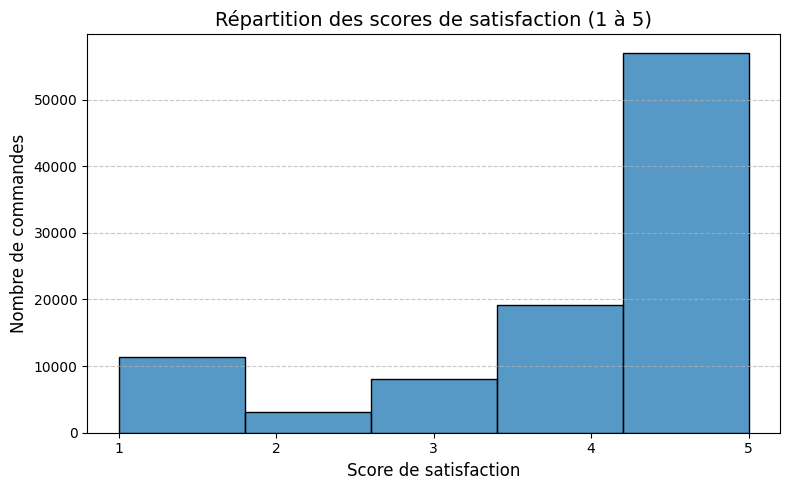

In [ ]:

plt.figure(figsize=(8, 5))  # Taille du graphique

sns.histplot(df_cmd["review_score"], bins=5, kde=False, edgecolor="black")

plt.title("Répartition des scores de satisfaction (1 à 5)", fontsize=14)
plt.xlabel("Score de satisfaction", fontsize=12)
plt.ylabel("Nombre de commandes", fontsize=12)


plt.xticks(ticks=[1, 2, 3, 4, 5], fontsize=10)


plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



## 2. Le délai de livraison a-t-il un impact sur la satisfaction ?

In [ ]:
df_cmd.head()

,order_id,customer_id,order_purchase_timestamp,duree_livraison,ecart_livraison,review_score,montant_cmd,montant_paye,livre_a_temps,code_zip
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,8 days 10:28:40,7,4.0,38.71,38.71,True,3149
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,13 days 18:46:08,5,4.0,141.46,141.46,True,47813
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,9 days 09:27:40,17,5.0,179.12,179.12,True,75265
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,13 days 05:00:36,12,5.0,72.20,72.20,True,59296
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2 days 20:58:23,9,5.0,28.62,28.62,True,9195


In [ ]:
df_cmd.dtypes

,0
order_id,object
customer_id,object
order_purchase_timestamp,datetime64[ns]
duree_livraison,timedelta64[ns]
ecart_livraison,object
review_score,Float64
montant_cmd,float64
montant_paye,float64
livre_a_temps,object
code_zip,int64


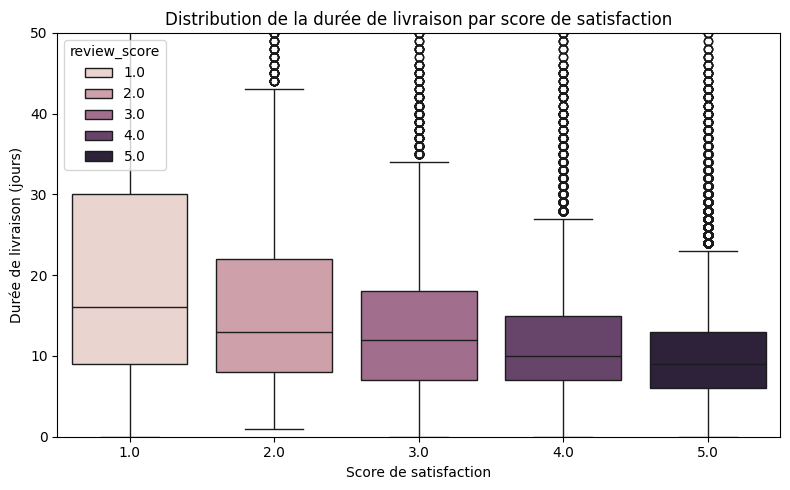

In [ ]:
# Ajouter la colonne de durée en jours
df_cmd["duree_livraison_jours"] = dfs["orders"]["duree_livraison"].dt.days

# Affichage boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cmd, x="review_score", y="duree_livraison_jours", hue="review_score")
plt.ylim(0, 50)
plt.title("Distribution de la durée de livraison par score de satisfaction")
plt.xlabel("Score de satisfaction")
plt.ylabel("Durée de livraison (jours)")
plt.tight_layout()
plt.show()


## 3. Affiche la moyenne de review_score selon que la commande a été livrée à temps ou non.

In [ ]:
dh=df_cmd.groupby("livre_a_temps")["review_score"].mean().reset_index(name="score_satis_moyen")
dh

,livre_a_temps,score_satis_moyen
0,False,2.566301
1,True,4.293889


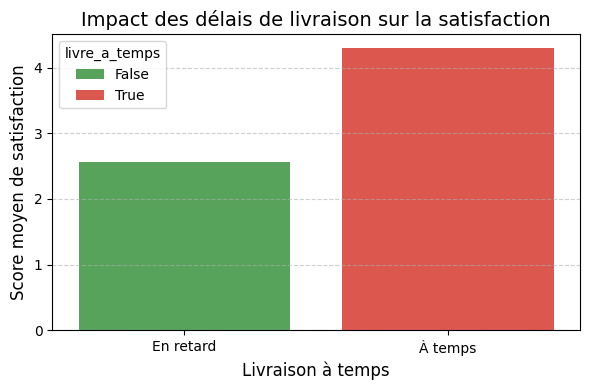

In [ ]:


plt.figure(figsize=(6, 4))

sns.barplot(data=dh, x="livre_a_temps", y="score_satis_moyen",hue="livre_a_temps", palette=["#4caf50", "#f44336"])

plt.title("Impact des délais de livraison sur la satisfaction", fontsize=14)
plt.xlabel("Livraison à temps", fontsize=12)
plt.ylabel("Score moyen de satisfaction", fontsize=12)

# Modifier les labels de l'axe X (booléen → lisible)
plt.xticks(ticks=[0, 1], labels=["En retard", "À temps"])

plt.legend=None

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 4. Quel est le montant moyen des commandes selon le score de satisfaction ?

In [ ]:
df_cmd.groupby("review_score")["montant_cmd"].mean().round(2)

,montant_cmd
review_score,
1.0,194.72
2.0,171.53
3.0,151.19
4.0,154.74
5.0,156.39


## 5. Quelles sont les 5 villes avec le plus de commandes livrées en retard ?

In [ ]:
# liste des (zip,city)
df_city=dfs["geolocation"][["geolocation_zip_code_prefix", "geolocation_city"]].drop_duplicates()
df_city.head()


,geolocation_zip_code_prefix,geolocation_city
0,1037,sao paulo
1,1046,sao paulo
3,1041,sao paulo
4,1035,sao paulo
5,1012,sao paulo


In [ ]:
#recupération des noms des villes
df_cmd=df_cmd.merge(df_city,left_on="code_zip",right_on="geolocation_zip_code_prefix",how="left")
df_cmd.head()

,order_id,customer_id,order_purchase_timestamp,duree_livraison,ecart_livraison,review_score,montant_cmd,montant_paye,livre_a_temps,code_zip,duree_livraison_jours,geolocation_zip_code_prefix,geolocation_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,8 days 10:28:40,7,4.0,38.71,38.71,True,3149,8.0,3149.0,sao paulo
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,13 days 18:46:08,5,4.0,141.46,141.46,True,47813,13.0,47813.0,barreiras
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,9 days 09:27:40,17,5.0,179.12,179.12,True,75265,9.0,75265.0,vianopolis
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,13 days 05:00:36,12,5.0,72.20,72.20,True,59296,13.0,59296.0,sao goncalo do amarante
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2 days 20:58:23,9,5.0,28.62,28.62,True,9195,2.0,9195.0,santo andre


In [ ]:
#filter les 5 villes avec plus de cmd en retard
df_retard = df_cmd.dropna(subset=["livre_a_temps"])
df_retard = df_retard[df_retard["livre_a_temps"] == False]
dh=df_retard.groupby("geolocation_city").size().sort_values(ascending=False).head(5).reset_index(name="nbr")
dh


,geolocation_city,nbr
0,sao paulo,945
1,rio de janeiro,788
2,salvador,207
3,belo horizonte,168
4,porto alegre,158


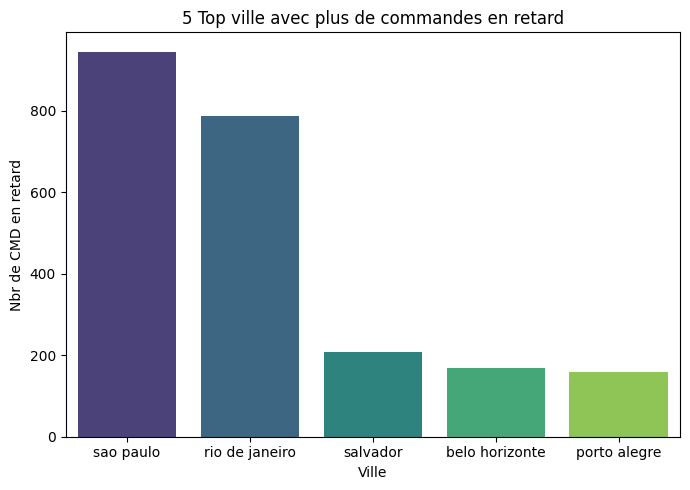

In [ ]:
#representation graphique des 5 villes avec plus de CMD en retard


# Barplot horizontal
plt.figure(figsize=(7, 5))
sns.barplot(
    data=dh,
    x="geolocation_city",
    y="nbr",
    palette="viridis",hue="geolocation_city",
    orient="v"
)
plt.xlabel("Ville")
plt.ylabel("Nbr de CMD en retard")
plt.title("5 Top ville avec plus de commandes en retard")
plt.tight_layout()
plt.show()

## 6. Quels sont les produits qui génèrent le plus de retards ?

In [ ]:
#liste des categorie des produit commandés
dt1=dfs["products"][["product_id","product_category_name"]].dropna()
dt2=dfs["items"][["order_id","product_id"]].dropna()
df_product=dt2.merge(dt1,how="left",on="product_id").dropna()
df_product.head()

,order_id,product_id,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,ferramentas_jardim


In [ ]:
#liste des commandes en retard

dh=df_retard.merge(df_product,how="inner",on="order_id").groupby(["product_category_name"]).size().sort_values(ascending=False).head(10).reset_index(name="nbr")
dh

,product_category_name,nbr
0,cama_mesa_banho,950
1,beleza_saude,901
2,moveis_decoracao,712
3,esporte_lazer,652
4,informatica_acessorios,622
5,relogios_presentes,499
6,utilidades_domesticas,465
7,telefonia,382
8,automotivo,359
9,ferramentas_jardim,348


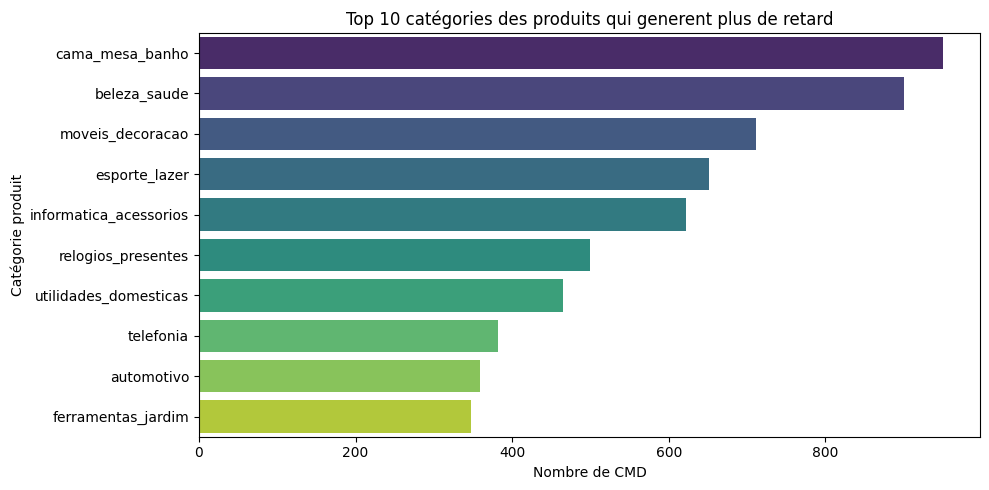

In [ ]:
# representation graphique
# Barplot horizontal
plt.figure(figsize=(10, 5))
sns.barplot(
    data=dh,
    y="product_category_name",
    x="nbr",
    palette="viridis",hue="product_category_name",
)
plt.xlabel("Nombre de CMD")
plt.ylabel("Catégorie produit")
plt.title("Top 10 catégories des produits qui generent plus de retard")
plt.tight_layout()
plt.show()


## 7. Quel est le nombre moyen de jours de retard par catégorie de produit (product_category_name) ?

In [ ]:

dh=df_retard.merge(df_product,how="inner",on="order_id").groupby(["product_category_name"])["duree_livraison_jours"].mean().round()
dh.head(10)

,duree_livraison_jours
product_category_name,
agro_industria_e_comercio,32.0
alimentos,24.0
alimentos_bebidas,33.0
artes,17.0
artes_e_artesanato,15.0
artigos_de_festas,18.0
artigos_de_natal,39.0
audio,30.0
automotivo,32.0


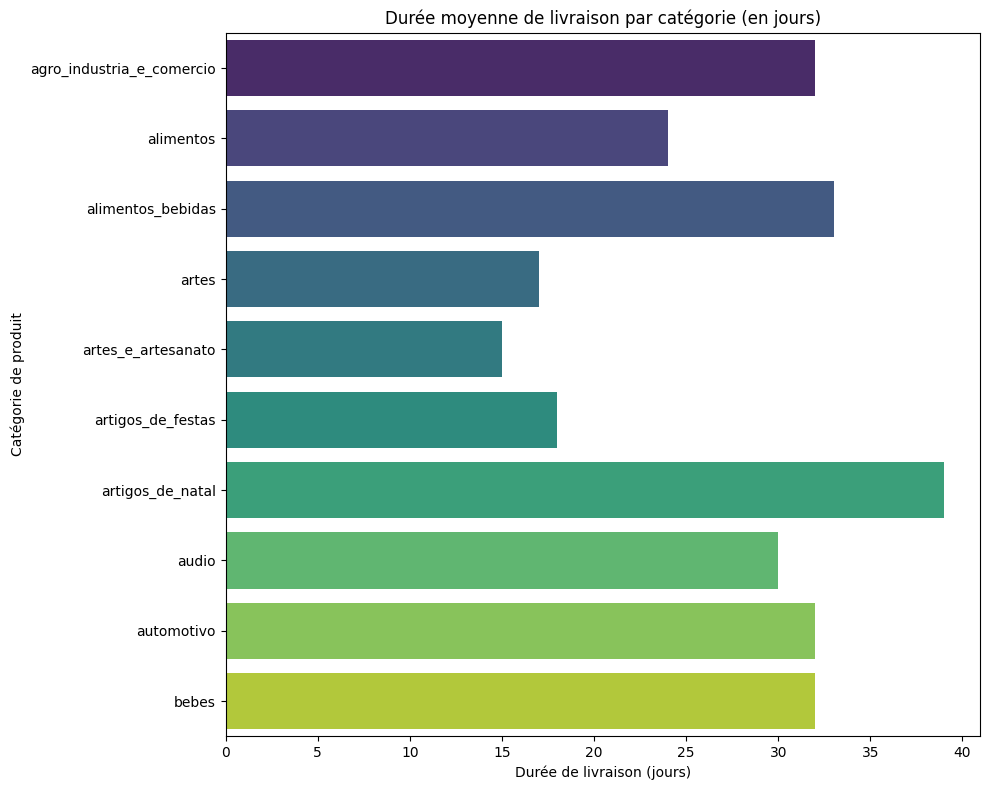

In [ ]:
df = dh.head(10).reset_index()

# Barplot horizontal
plt.figure(figsize=(10, 8))
sns.barplot(
    data=df,
    x="duree_livraison_jours",
    y="product_category_name",
    palette="viridis",hue="product_category_name"
)
plt.xlabel("Durée de livraison (jours)")
plt.ylabel("Catégorie de produit")
plt.title("Durée moyenne de livraison par catégorie (en jours)")
plt.tight_layout()
plt.show()